# Electrical Transmission lines Fault detection

### Introduction

In our ever-advancing society, the escalating demand for electrical power has become a defining characteristic of modern life. The surge in technological advancements, coupled with the continuous expansion of industrial and residential areas, has led to an exponential growth in our reliance on electricity. To meet this burgeoning need, power production sources often reside in regions distant from the major consumption centers, necessitating an intricate network of transmission lines.

Transmission lines at their core, are complex systems composed of conductors, insulators, and supporting structures that work in concert to facilitate the efficient transfer of electricity over vast distances from the production source to various regions (powering homes, businesses, and critical infrastructure). 

However, the inherent complexity of the electrical power system renders transmission lines susceptible to faults and disturbances. These faults can arise from a variety of factors, including weather conditions, equipment failures, or unforeseen events. The consequences of transmission line faults are profound, potentially leading to power outages that reverberate across vast areas. In an interconnected world heavily dependent on electricity, these disruptions can disrupt industrial operations, compromise communication networks, and impact essential services.

Preventing faults in transmission lines is paramount to maintaining the stability and reliability of the power grid. Proactive measures, such as regular maintenance, technological innovations in monitoring and control systems, and the implementation of protective devices, play a crucial role in averting potential failures. Timely detection and mitigation of faults not only safeguard the integrity of the transmission lines but also prevent cascading effects that could have far-reaching economic and social implications.

### Transmission lines fault

A transmission line fault refers to any abnormal condition or interruption in the normal operation of an electrical transmission line. These faults can manifest as a result of various factors, including equipment malfunctions, environmental conditions (lightning strikes, environmental factors like storms or high winds), or external disturbances (human activities). there are multiple types of transmission line faults bu the most common are: open circuits and short circuits faults.


#### Open circuits faults (series): 

This happens when an unintended connection is created between a conductor and the ground, which causes an interruption in the electrical path.


#### Short circuits faults (shunt): 

An unintended connection occurs between two conductors, resulting in a low-resistance path for current flow. It can be classified into two categories:

1. **Symmetrical Faults:**
   - All phases experience a short circuit either to each other or to the earth, denoted as (L-L-L) or (L-L-L-G).
   - The nature of this fault is balanced, meaning that fault currents in all phases are symmetrical. Their magnitudes are equal, and they are equally displaced by an angle of 120 degrees.
   - Although it is a more severe type of fault, symmetrical faults occur rarely.

2. **Asymmetrical Faults:**
   - Asymmetrical faults involve one or two phases.
   - In this type of fault, the three-phase lines become unbalanced.
   - The main types of asymmetrical faults are line-to-ground (L-G), line-to-line (L-L), and double line-to-ground (LL-G) faults.
   - These types of faults are more common in power systems.
   

## About the Dataset

The data used in this study was extracted from a power system modeled in MATLAB to simulate fault analysis. The power system consists of 4 generators of 11 KV, each pair located at each end of the transmission line. Transformers are present in between to simulate and study the various faults at the midpoint of the transmission line.

The features of the dataset consists of the lines currents and voltages measurments [Ia, Ib, Ic, Va, Vb, Vc].

For the target output we can either use the binary labeled fault detection dataset where 0 indicates no fault and 1 that fault is present (does not matter in which line it occurs), or we can use the multi labeled dataset where we must detect the fault in each line [G C B A], for example: [0 0 0 0] indicates there is no fault at all, [1 0 0 0] is a ground fault, [0 0 0 1] indicates a fault in line A, [1 0 1 1] indicates an LLG fault between the phases A,B and the ground,etc.


## Our Goal

* Explore the relation between lines currents and voltages and the fault status.

* Solve the binary and multi class fault classification problems using ML/DL models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

In [3]:
binary_data = pd.read_csv("./Dataset/detect_dataset.csv")
multiclass_data = pd.read_csv("./Dataset/classData.csv")

In what follows, we will study each dataset seperately starting with the binary classification problem and then solving the mutli classes classification.

# Binary fault detection

In [4]:
binary_data.head()

Output (S)          Ia        Ib          Ic        Va        Vb        Vc   
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431  \
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202   
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251   
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963   
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050   

   Unnamed: 7  Unnamed: 8  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [5]:
binary_data.shape

(12001, 9)

In [6]:
binary_data.describe().T

count       mean         std         min        25%       50%   
Output (S)  12001.0   0.457962    0.498250    0.000000   0.000000  0.000000  \
Ia          12001.0   6.709369  377.158470 -883.542316 -64.348986 -3.239788   
Ib          12001.0 -26.557793  357.458613 -900.526951 -51.421937  4.711283   
Ic          12001.0  22.353043  302.052809 -883.357762 -54.562257 -0.399419   
Va          12001.0   0.010517    0.346221   -0.620748  -0.237610  0.002465   
Vb          12001.0  -0.015498    0.357644   -0.659921  -0.313721 -0.007192   
Vc          12001.0   0.004980    0.349272   -0.612709  -0.278951  0.008381   
Unnamed: 7      0.0        NaN         NaN         NaN        NaN       NaN   
Unnamed: 8      0.0        NaN         NaN         NaN        NaN       NaN   

                  75%         max  
Output (S)   1.000000    1.000000  
Ia          53.823453  885.738571  
Ib          69.637787  889.868884  
Ic          45.274542  901.274261  
Va           0.285078    0.609864  
Vb           0.248681    0.627875  
Vc           0.289681    0.608243  
Unnamed: 7        NaN         NaN  
Unnamed: 8        NaN         NaN

Given that the studied electrical system is composed of 4 generators of 11 KV each, by looking at the small line voltages shown above we can concluded that their values are normalized.

In [7]:
# Drop last two columns as they don't contain any data
binary_data = binary_data.iloc[:, :-2]

In [8]:
# check if the output classes are balanced
binary_data["Output (S)"].value_counts(normalize=True)

Output (S)
0    0.542038
1    0.457962
Name: proportion, dtype: float64

In [9]:
# Check if there are null values
binary_data.isna().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

It seems that our data doesn't contain any Nan value and the target output is relatively balanced, thus we can move to data exploration.

## Exploratory Data Analysis

In [10]:
df_eda = binary_data.copy()
df_eda["Output"] = df_eda["Output (S)"].map({0: "No Fault", 1: "Fault"})

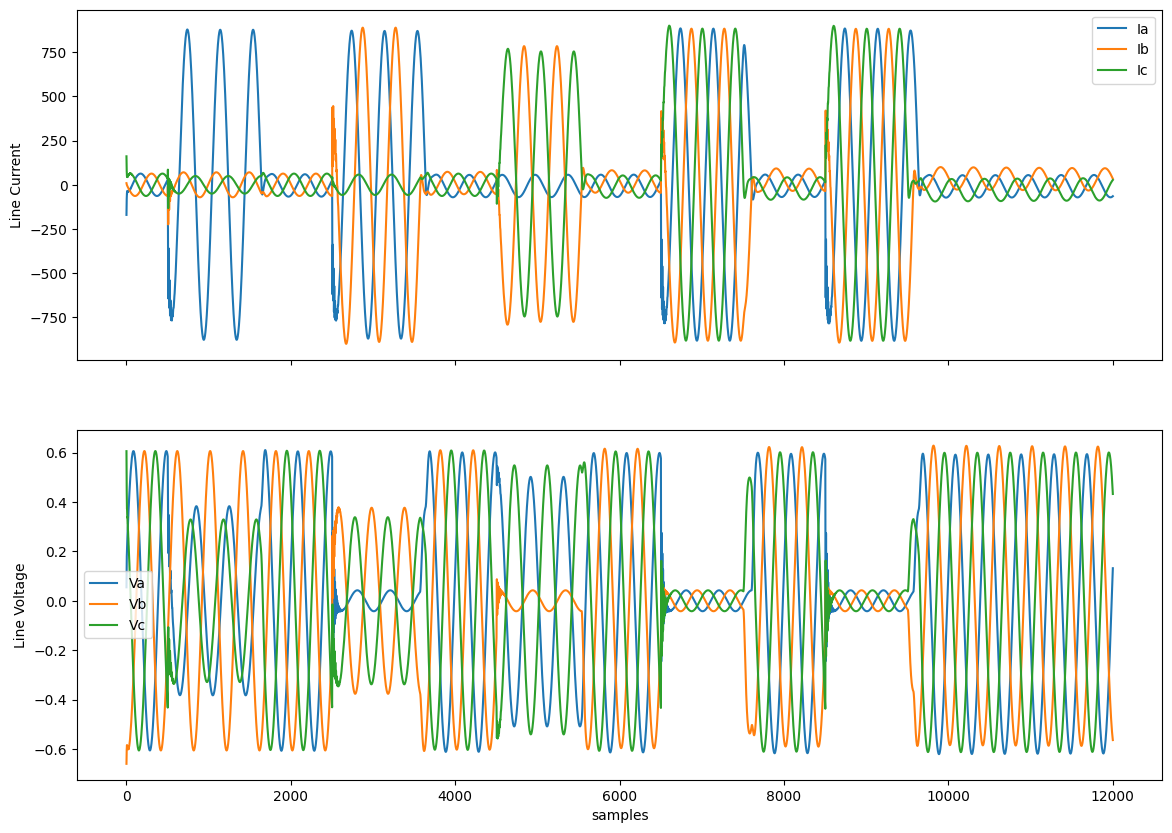

In [11]:
# let's see the lines currents and voltages plots
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
df_eda["Ia"].plot(ax=axs[0])
df_eda["Ib"].plot(ax=axs[0])
df_eda["Ic"].plot(ax=axs[0])
df_eda["Va"].plot(ax=axs[1])
df_eda["Vb"].plot(ax=axs[1])
df_eda["Vc"].plot(ax=axs[1])
axs[0].set_ylabel("Line Current")
axs[1].set_ylabel("Line Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

Observing the sinusoidal forms of currents and voltages, as anticipated, whenever there are fluctuations in either the current or voltage it's an indication of a fault in the line. It appears challenging to gain insights into line faults by further examining these plots. Therefore, our focus will shift to analyzing each line individually.

### Line A

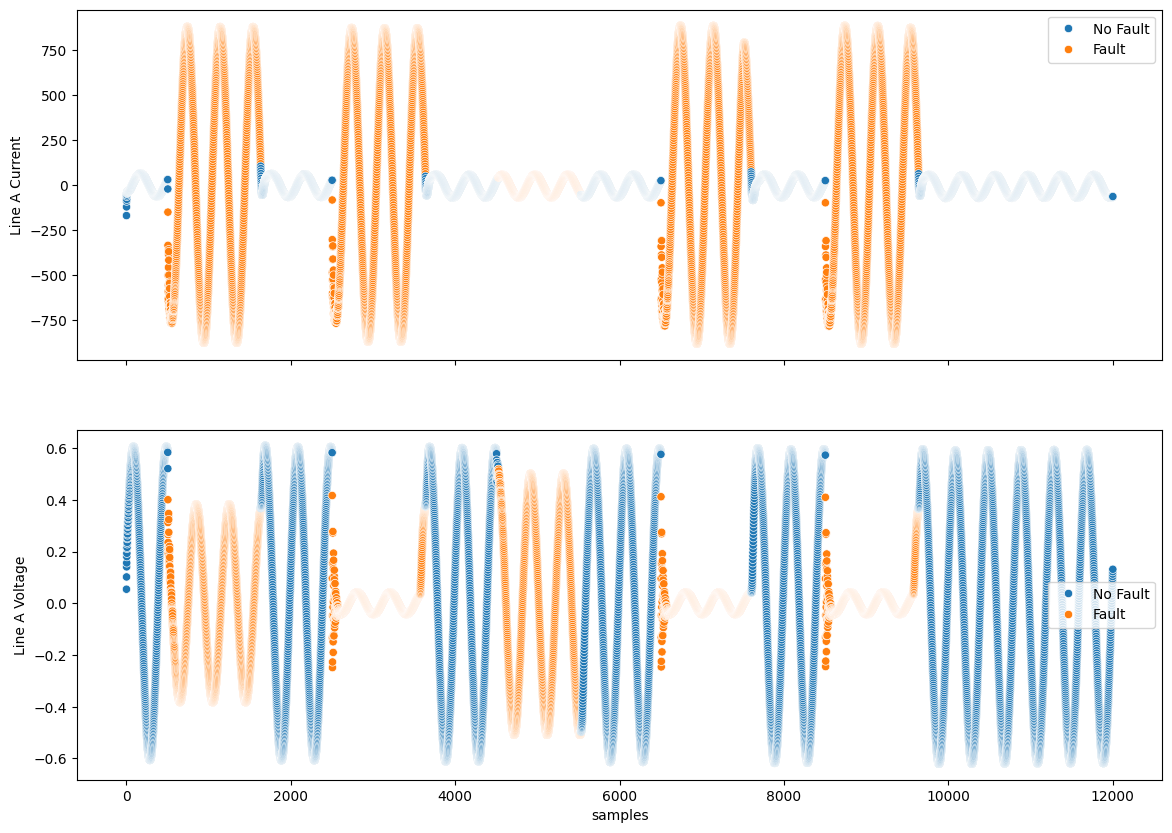

In [12]:
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
sns.scatterplot(data=df_eda, y="Ia", x=df_eda.index, hue='Output', ax=axs[0])
sns.scatterplot(data=df_eda, y="Va", x=df_eda.index, hue='Output', ax=axs[1])
axs[0].set_ylabel("Line A Current")
axs[1].set_ylabel("Line A Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

### Line B

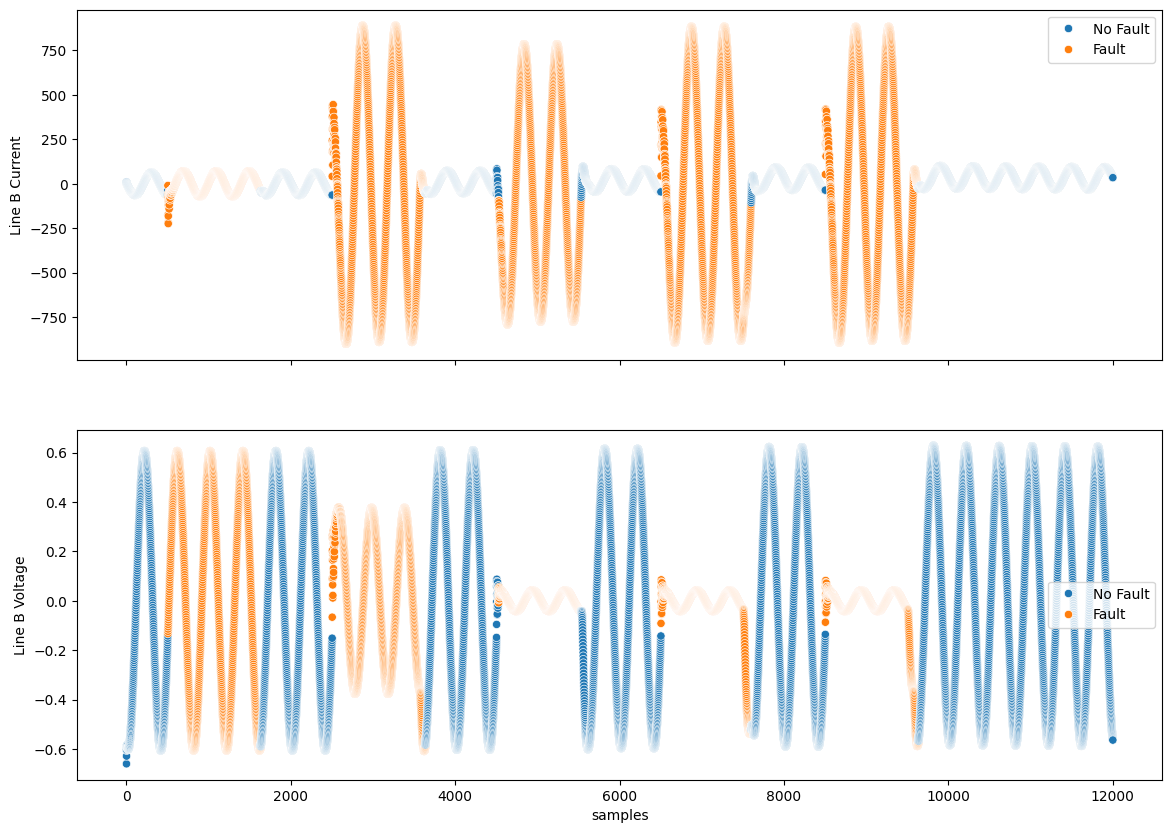

In [13]:
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
sns.scatterplot(data=df_eda, y="Ib", x=df_eda.index, hue='Output', ax=axs[0])
sns.scatterplot(data=df_eda, y="Vb", x=df_eda.index, hue='Output', ax=axs[1])
axs[0].set_ylabel("Line B Current")
axs[1].set_ylabel("Line B Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

### Line C

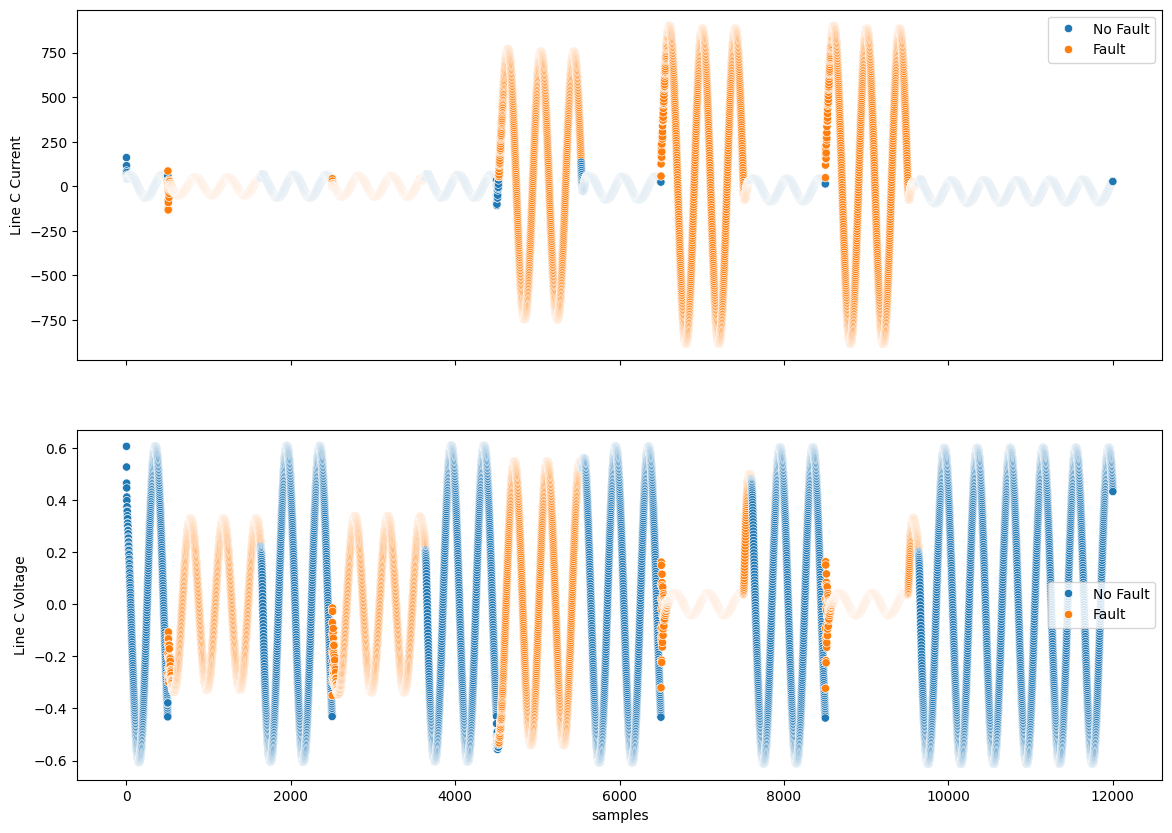

In [14]:
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
sns.scatterplot(data=df_eda, y="Ic", x=df_eda.index, hue='Output', ax=axs[0])
sns.scatterplot(data=df_eda, y="Vc", x=df_eda.index, hue='Output', ax=axs[1])
axs[0].set_ylabel("Line C Current")
axs[1].set_ylabel("Line C Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

#### Observation

* The plotted lines suggest that a line undergoes a fault when there is a swift decline in voltage accompanied by a rapid surge in current, or vice versa.

* During a fault occurrence, the current peaks significantly while the voltage exhibits smaller peaks. Under normal conditions (no fault), both current and voltage follow a sinusoidal pattern, with consistent highs and lows in each period.

<Axes: xlabel='Vc', ylabel='Count'>

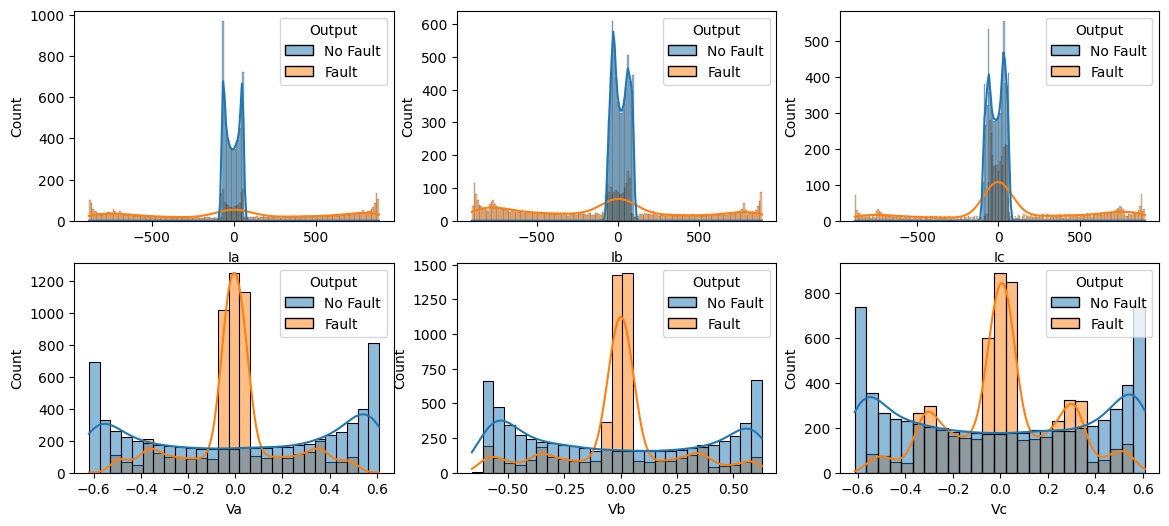

In [15]:
# Lines currents and voltages distributions (Fault vs No Fault)
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
sns.histplot(data=df_eda, x="Ia", hue='Output', kde=True, ax=axes[0, 0])
sns.histplot(data=df_eda, x="Ib", hue='Output', kde=True, ax=axes[0, 1])
sns.histplot(data=df_eda, x="Ic", hue='Output', kde=True, ax=axes[0, 2])
sns.histplot(data=df_eda, x="Va", hue='Output', kde=True, ax=axes[1, 0])
sns.histplot(data=df_eda, x="Vb", hue='Output', kde=True, ax=axes[1, 1])
sns.histplot(data=df_eda, x="Vc", hue='Output', kde=True, ax=axes[1, 2])

#### Observation

* The distribution plot validates our earlier observation, indicating that when a line experiences a fault, the current reaches higher peaks (or lower lows if negative). This is evident in the fault distribution, which spreads across the entire range. Conversely, when the line is stable, the current distribution remains constant, resembling a normal distribution.

* The voltage distribution plot further supports this insight, illustrating that during a fault, the voltage deviates from its normal condition values, exhibiting a significant decrease.

<Axes: >

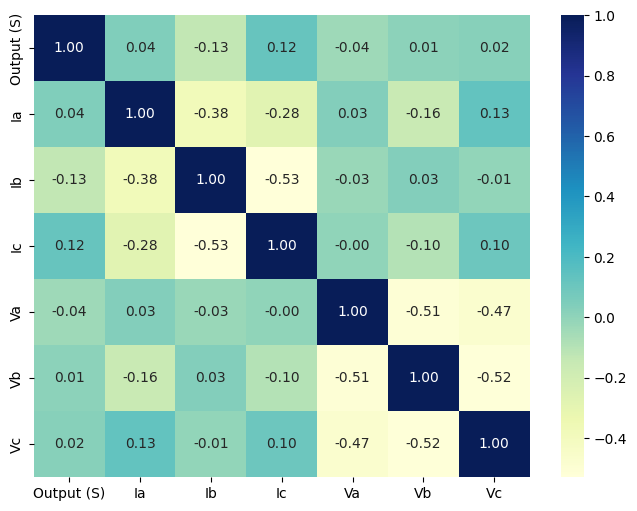

In [16]:
# Let's see the correlation between our features
plt.figure(figsize=(8, 6))
sns.heatmap(binary_data.corr(), cmap='YlGnBu', fmt='.2f', annot=True)

#### Observation

* There appears to be no discernible correlation between our features (lines current & voltage) and the target fault class.

* While the features show generally low correlation, an exception is noted for the current or voltage between two different phases, aligning with expectations. This correlation is logical as these features exhibit the same evolution but are phased by 120° (three-phase theory).

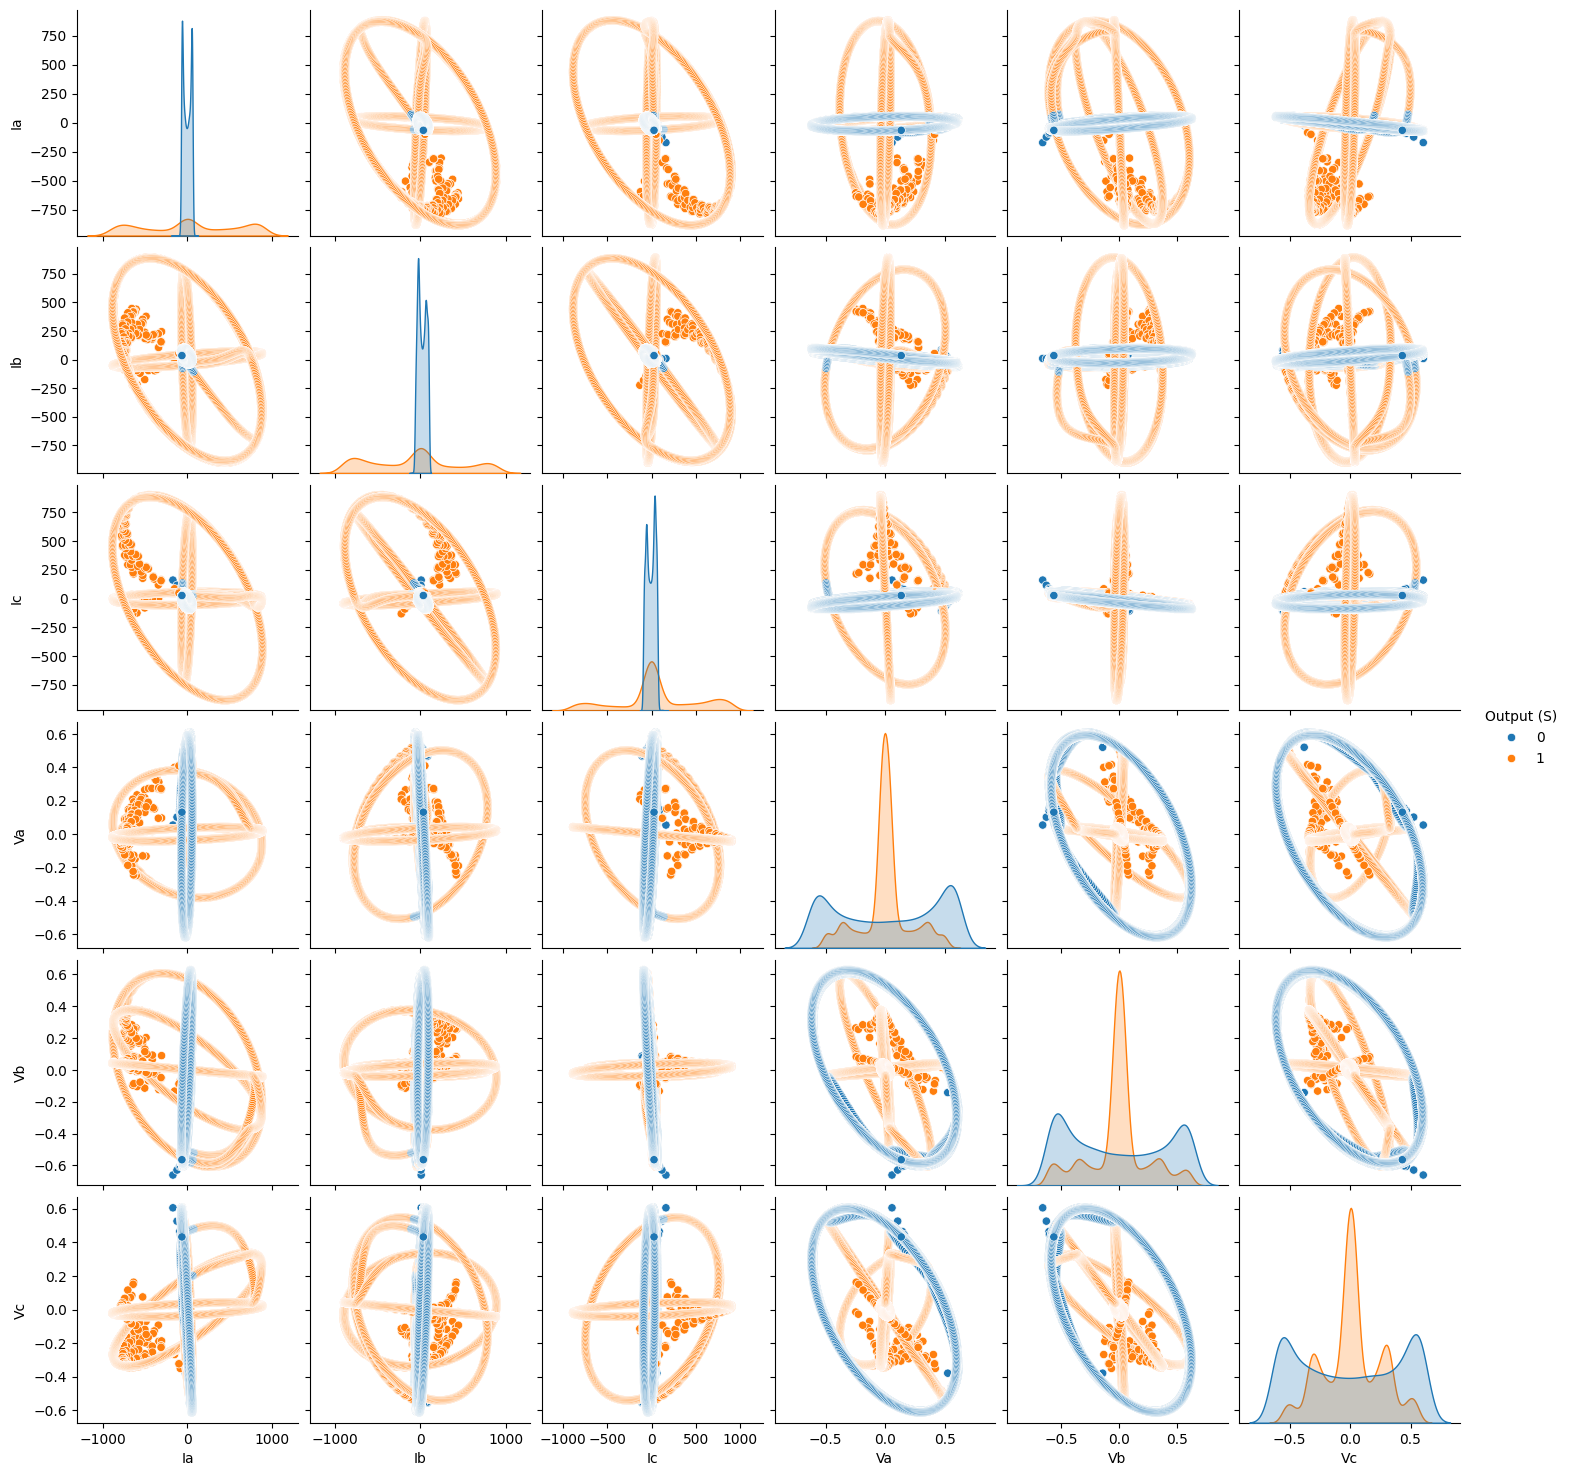

In [17]:
# plot features distribution
sns.pairplot(binary_data, hue='Output (S)')

## Building ML models

In [18]:
target = binary_data["Output (S)"]
X = binary_data.drop(["Output (S)"], axis=1)

In [19]:
# Split the dataset: Training(80%), Testing(20%)
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)

In [20]:
labels = ["No Fault", "Fault"]

def accuracy_logs(y_test, y_pred):
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    print("Metrics table:\n", classification_report(y_test, y_pred, target_names=labels))

def draw_confusion_matrix(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(matrix, index=labels, columns=labels)
    plt.figure(figsize=(6, 4))
    plot = sns.heatmap(matrix, cmap='YlGnBu', fmt='.2f', annot=True)
    plot.set_xlabel('Predicted')
    plot.set_ylabel('Real')

### Logistic Regression Classifier

In [21]:
lrg_clf = LogisticRegression()
lrg_clf.fit(x_train, y_train)
y_pred = lrg_clf.predict(x_test)

In [22]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.7396917950853811
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.68      1.00      0.81      1325
       Fault       1.00      0.42      0.59      1076

    accuracy                           0.74      2401
   macro avg       0.84      0.71      0.70      2401
weighted avg       0.82      0.74      0.71      2401



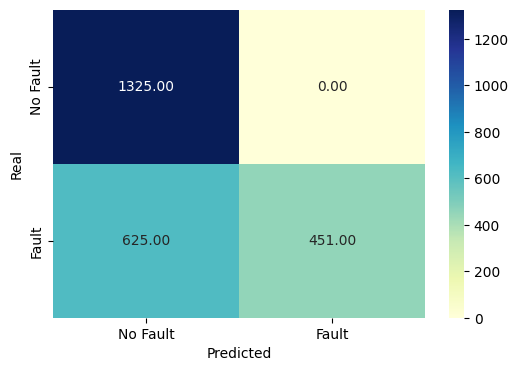

In [23]:
draw_confusion_matrix(y_test, y_pred)

### Support Vector Machine

In [24]:
svc_clf = SVC()
svc_clf.fit(x_train, y_train)
y_pred = svc_clf.predict(x_test)

In [25]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.9775093710953769
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.96      1.00      0.98      1325
       Fault       1.00      0.95      0.97      1076

    accuracy                           0.98      2401
   macro avg       0.98      0.97      0.98      2401
weighted avg       0.98      0.98      0.98      2401



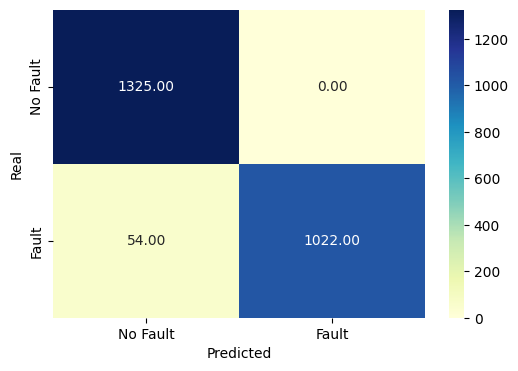

In [26]:
draw_confusion_matrix(y_test, y_pred)

### Decision Tree Classifier

In [27]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)

In [28]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.9933361099541858
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.99      1.00      0.99      1325
       Fault       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



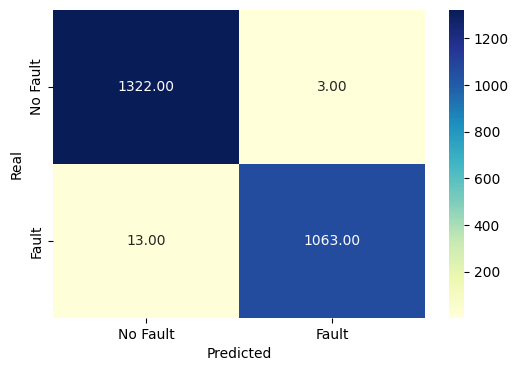

In [29]:
draw_confusion_matrix(y_test, y_pred)

### Random Forest Classifier

In [30]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

In [31]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.9941690962099126
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.99      1.00      0.99      1325
       Fault       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



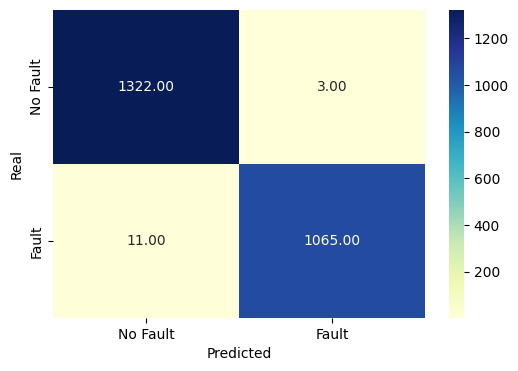

In [32]:
draw_confusion_matrix(y_test, y_pred)

### XGBoost Classifier

In [33]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)

In [34]:
accuracy_logs(y_test, y_pred)

Accuracy score: 0.9941690962099126
Metrics table:
               precision    recall  f1-score   support

    No Fault       0.99      1.00      0.99      1325
       Fault       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



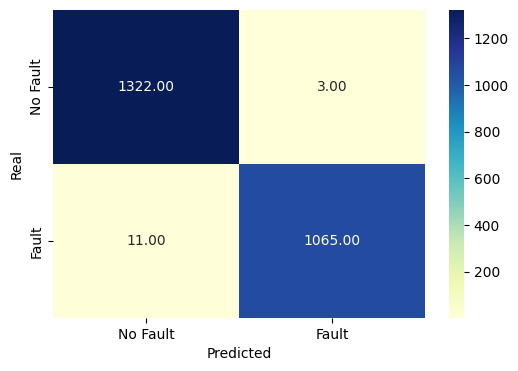

In [35]:
draw_confusion_matrix(y_test, y_pred)

#### Observations

* The logistic regression classifier yielded a suboptimal accuracy result of only 73% and an unsatisfactory recall score of 42%. This is particularly problematic since we prioritize minimizing false negatives, even if it means accepting an increase in false positives—instances where the model predicts a fault when none exists.

* In contrast, the SVM classifier demonstrated significantly improved performance with an accuracy of 97.7% and a high recall score of 95%. However, it still failed to detect faults in 54 instances, falling short of our goal for comprehensive fault detection.

* The last three models—Decision Tree, Random Forest, and XGBoost—delivered the highest accuracy results so far (99.3%, 99.4%, 99.4%). And all three models achieved an impressive recall score of 99%.

* While the Decision Tree failed to detect 13 faulty lines, both Random Forest and XGBoost missed 12 faulty lines. Although these numbers could be deemed acceptable relative to the total faulty lines, there is room for improvement through further model tuning.

* Notably, the minimal number of false positives (3) generated by the models (Decision Tree, Random Forest, XGBoost) is not a significant concern, as these instances will not result in actual power outages.

#### Conclusion

* We have achieved remarkable accuracy results of 99.4% and a recall score of 99% with two models, Random Forest and XGBoost. Considering these outcomes as satisfactory, we have decided not to delve into further hyperparameter tuning. Our focus will now shift directly to addressing the multi-class fault detection problem.

# Multi class fault detection

In this classification problem, the goal is to predict the type of fault occurring based on the currents and voltages observed in the three phases (A, B, C).

In [36]:
multiclass_data.head()

G  C  B  A          Ia          Ib          Ic        Va        Vb   
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935  \
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   

         Vc  
0 -0.267815  
1 -0.189099  
2 -0.151428  
3 -0.130570  
4 -0.113983

In this dataset also we see that the voltage values have been normalized (probably divided by max voltage 11KV).

In [37]:
multiclass_data.shape

(7861, 10)

In [38]:
# construct a new feature for fault classes containing (G,A,B,C) values
multiclass_data["fault_class"] = multiclass_data.apply(lambda x: f'{int(x["G"])}{int(x["A"])}{int(x["B"])}{int(x["C"])}', axis=1)

In [39]:
# check if the fault classes are balanced
multiclass_data["fault_class"].value_counts(normalize=True)

fault_class
0000    0.300852
1110    0.144256
1111    0.144129
1100    0.143620
0111    0.139422
0011    0.127719
Name: proportion, dtype: float64

In [40]:
# check if there are missing values
multiclass_data.isna().sum()

G              0
C              0
B              0
A              0
Ia             0
Ib             0
Ic             0
Va             0
Vb             0
Vc             0
fault_class    0
dtype: int64

### Observation

* Some of the fault classes are not present in our data, with 4 lines (G,A,B,C) that could be faulty or not we should have 2^4=16 potential fault classes but we only have 6 types of fault in our dataset.

* The majority of instances (30%) in the dataset indicate scenarios where none of the 4 lines (G, A, B, C) are at fault, other fault types are evenly distributed, each accounting for 15% of the data.

* There are no missing values in any of the features within our dataset.

## Exploratory Data Analysis

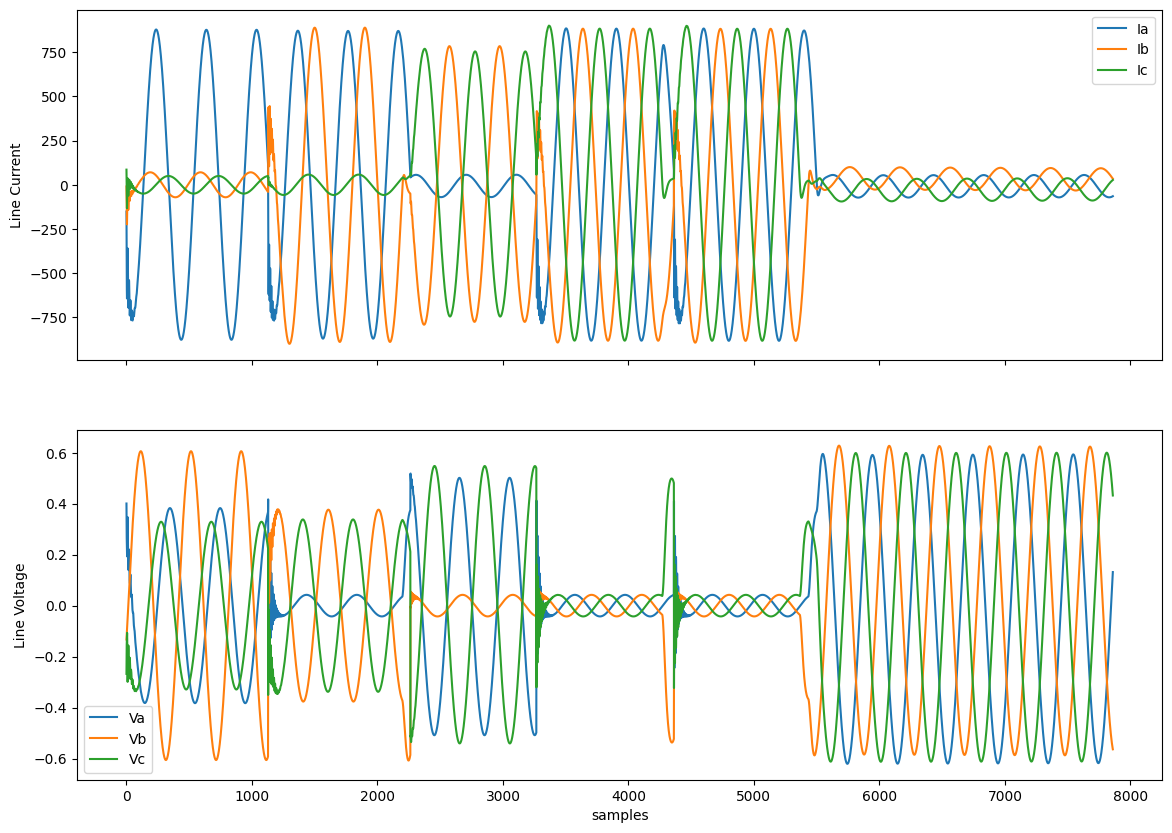

In [41]:
df_eda = multiclass_data.copy()

# as we did previously let's plot the lines currents and voltages
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
df_eda["Ia"].plot(ax=axs[0])
df_eda["Ib"].plot(ax=axs[0])
df_eda["Ic"].plot(ax=axs[0])
df_eda["Va"].plot(ax=axs[1])
df_eda["Vb"].plot(ax=axs[1])
df_eda["Vc"].plot(ax=axs[1])
axs[0].set_ylabel("Line Current")
axs[1].set_ylabel("Line Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

#### Observation 

From the plots, it's evident that the currents and voltages of the lines exhibit significant fluctuations in both amplitude and frequency until ~5700 sample. After this point, both signals stabilize, suggesting that, during the initial segment of the data, at least one of the lines was experiencing a fault.

As we did earlier, let's examine the evolution of each line individually considering the fault classes present.

### Line A

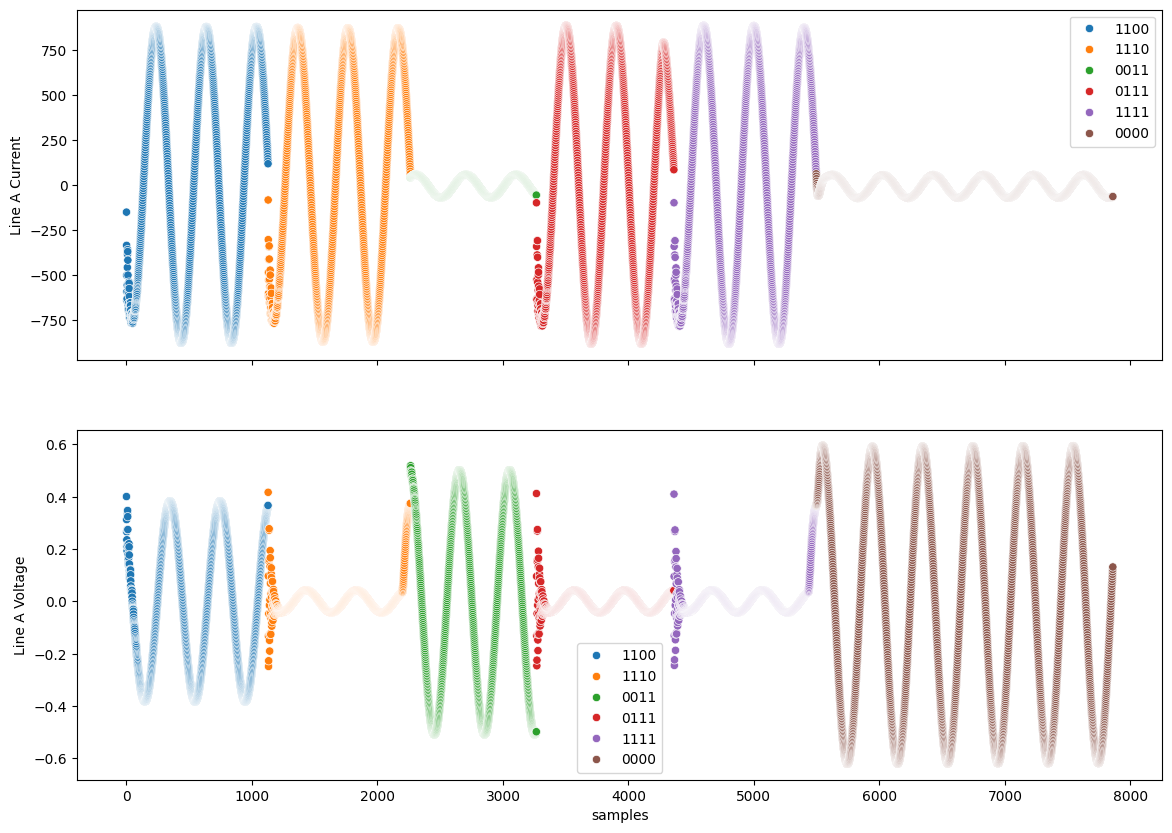

In [42]:
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
sns.scatterplot(data=df_eda, y="Ia", x=df_eda.index, hue='fault_class', ax=axs[0])
sns.scatterplot(data=df_eda, y="Va", x=df_eda.index, hue='fault_class', ax=axs[1])
axs[0].set_ylabel("Line A Current")
axs[1].set_ylabel("Line A Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

### Line B

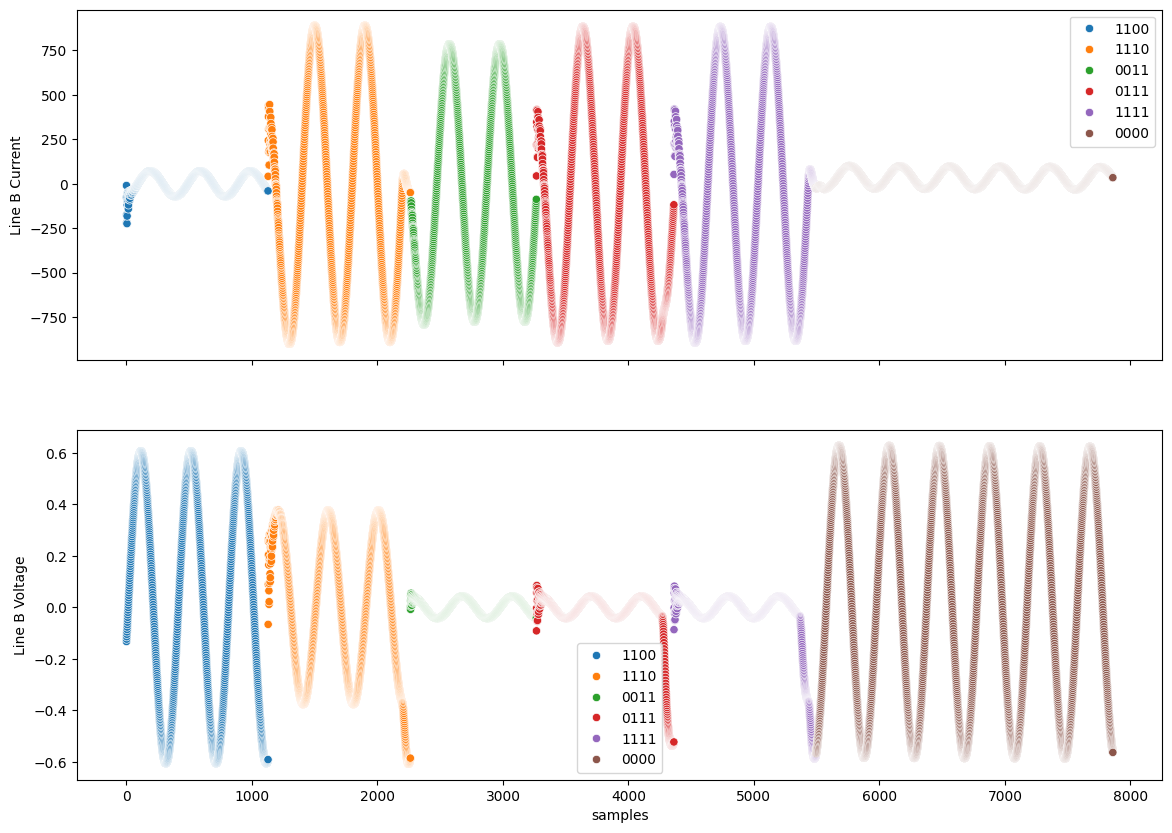

In [43]:
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
sns.scatterplot(data=df_eda, y="Ib", x=df_eda.index, hue='fault_class', ax=axs[0])
sns.scatterplot(data=df_eda, y="Vb", x=df_eda.index, hue='fault_class', ax=axs[1])
axs[0].set_ylabel("Line B Current")
axs[1].set_ylabel("Line B Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

### Line C

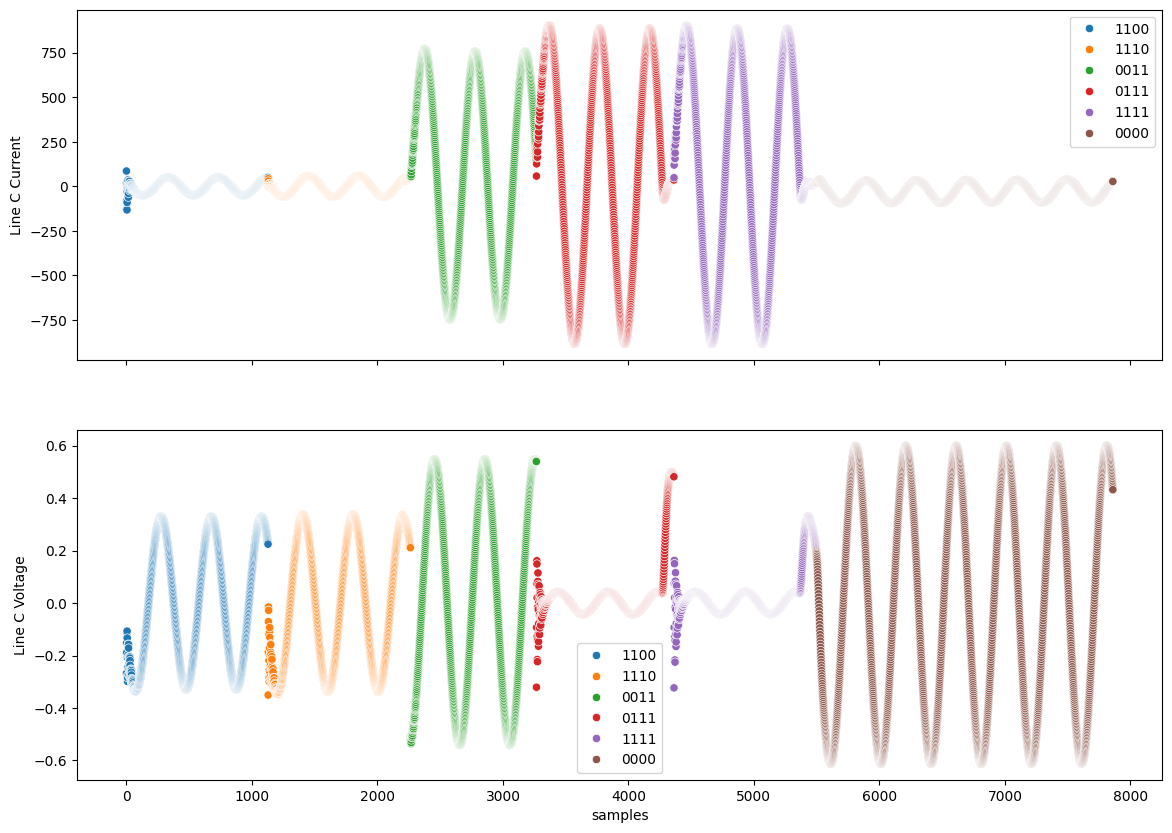

In [44]:
fig, axs = plt.subplots(2, 1, sharex='col', figsize=(14, 10))
sns.scatterplot(data=df_eda, y="Ic", x=df_eda.index, hue='fault_class', ax=axs[0])
sns.scatterplot(data=df_eda, y="Vc", x=df_eda.index, hue='fault_class', ax=axs[1])
axs[0].set_ylabel("Line C Current")
axs[1].set_ylabel("Line C Voltage")
plt.xlabel("samples")
axs[0].legend()
axs[1].legend()

#### Observation

* The plots readily reveal distinct asymmetrical faults, denoted by the classes 1100 (L-G), 1110 (LL-G), and 0011 (LL). In such instances, the evolution of currents and voltages across phases lacks balance. For instance, in the 1100 case (indicating a line A to ground G fault, represented by the blue curve), the amplitudes of current and voltage differ among the three phases.

* Additionally, symmetrical faults manifest in the plots, characterized by the classes 1111 (LLL-G) and 0111 (LLL). Here, a uniform amplitude is observable for both current and voltage across the three phases.

* As observed previously after ~5700 sample the three lines are in a stable state (0000, no fault).

<Axes: >

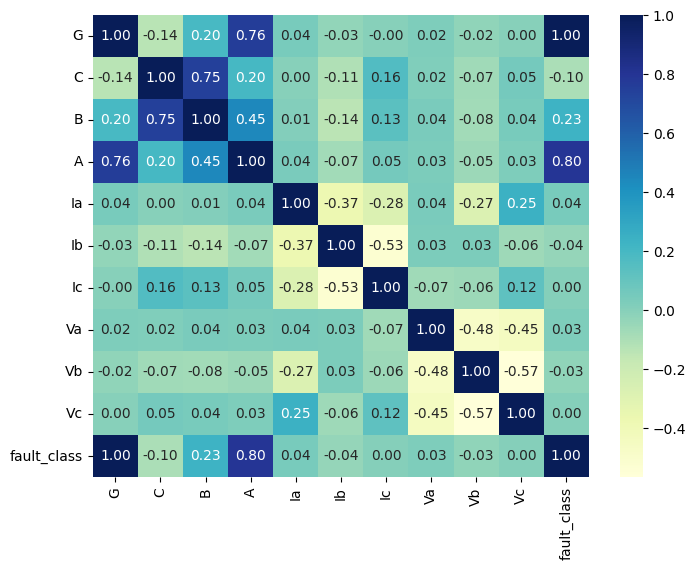

In [45]:
# Let's see the correlation between our features
plt.figure(figsize=(8, 6))
sns.heatmap(multiclass_data.corr(), cmap='YlGnBu', fmt='.2f', annot=True)

#### Observation

* Similar to the binary classification scenario, there exists a correlation among the currents and voltages of the three phases (which is expected in three phases electrical systems).

* The correlation table additionally reveals a connection between various line faults, particularly between ground faults (G) and lines faults (A, B, C).

* Notably, the fault class exhibit a surprisingly strong correlation with faults in line A.

## Building ML models

In our dataset, each line (G, A, B, C) has a corresponding output fault. Additionally, we've created a new composite target output called 'fault_class,' representing the current fault across the four lines. This allows us to explore training approaches using either a multioutput model or a multi-label model. We will evaluate and compare the performance of both techniques.

## 1- Multi-label Classification

In [46]:
data = multiclass_data.copy()
target = data["fault_class"]
X = data.drop(["G", "A", "B", "C", "fault_class"], axis=1)

In [47]:
# we must first encode our fault classes into numerical values
encoder = LabelEncoder()
Y = encoder.fit_transform(target)

In [48]:
# Split the dataset: Training(80%), Testing(20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [49]:
classes_labels = list(encoder.classes_)

# keep track of precision, recall scores
precision_scores = {}
recall_scores = {}

def plot_classification_result(model, y_test, y_pred):
    precision_scores[model] = np.round(np.array(precision_score(y_test, y_pred, average=None)), 2)
    recall_scores[model] = np.round(np.array(recall_score(y_test, y_pred, average=None)), 2)
    print("Average accuracy score: ", accuracy_score(y_test, y_pred))
    print("Metrics table:\n", classification_report(y_test, y_pred, target_names=classes_labels))
    print("Confusion matrix:\n")
    matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(matrix, index=classes_labels, columns=classes_labels)
    plt.figure(figsize=(6, 4))
    plot = sns.heatmap(matrix, cmap='YlGnBu', fmt='.2f', annot=True)
    plot.set_xlabel('Predicted')
    plot.set_ylabel('Real')

### Logistic Regression Classifier

In [50]:
lrg_clf = LogisticRegression(multi_class='auto', max_iter=1000)
lrg_clf.fit(x_train, y_train)
y_pred = lrg_clf.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Average accuracy score:  0.343928798474253
Metrics table:
               precision    recall  f1-score   support

        0000       0.33      1.00      0.50       469
        0011       0.00      0.00      0.00       197
        0111       0.30      0.19      0.23       223
        1100       0.00      0.00      0.00       221
        1110       1.00      0.14      0.24       219
        1111       0.00      0.00      0.00       244

    accuracy                           0.34      1573
   macro avg       0.27      0.22      0.16      1573
weighted avg       0.28      0.34      0.22      1573

Confusion matrix:



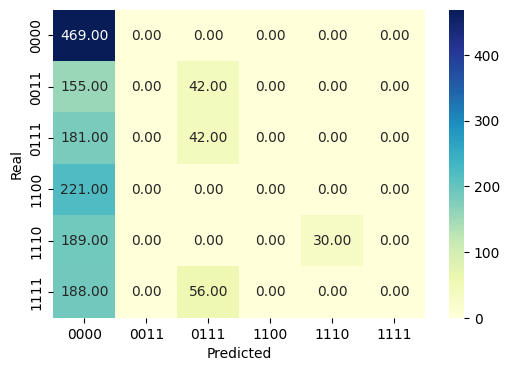

In [51]:
plot_classification_result("Logistic regression", y_test, y_pred)

#### Observation

The logistic regression model produced terrible results across all classes, yielding a very low average accuracy of 34%. The model appears to struggle in distinguishing between the various classes, predominantly predicting the majority of samples as the '0000' class (no fault).

### Support Vector Machine

In [52]:
svc_clf = SVC()
svc_clf.fit(x_train, y_train)
y_pred = svc_clf.predict(x_test)

Average accuracy score:  0.7501589319771138
Metrics table:
               precision    recall  f1-score   support

        0000       0.90      1.00      0.94       469
        0011       0.77      0.90      0.83       197
        0111       0.48      0.49      0.48       223
        1100       0.82      0.87      0.84       221
        1110       0.74      0.83      0.78       219
        1111       0.45      0.20      0.28       244

    accuracy                           0.75      1573
   macro avg       0.69      0.72      0.69      1573
weighted avg       0.72      0.75      0.73      1573

Confusion matrix:



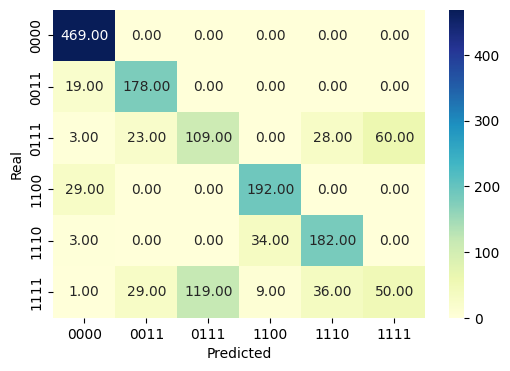

In [53]:
plot_classification_result("SVC", y_test, y_pred)

#### Observation

The SVM classifier showcases a notable improvement over logistic regression, attaining a higher average accuracy of 75%. While the model demonstrates relatively good precision and recall scores for specific classes (0000, 0011, 1100, 1110), though not entirely satisfactory, but the model encounters challenges in predicting the two remaining classes reulting in very low accuracy scores.

### Decision Tree Classifier

In [54]:
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)

Average accuracy score:  0.8792116973935156
Metrics table:
               precision    recall  f1-score   support

        0000       1.00      1.00      1.00       469
        0011       0.99      1.00      1.00       197
        0111       0.58      0.64      0.61       223
        1100       0.98      1.00      0.99       221
        1110       1.00      0.98      0.99       219
        1111       0.64      0.58      0.61       244

    accuracy                           0.88      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.88      0.88      0.88      1573

Confusion matrix:



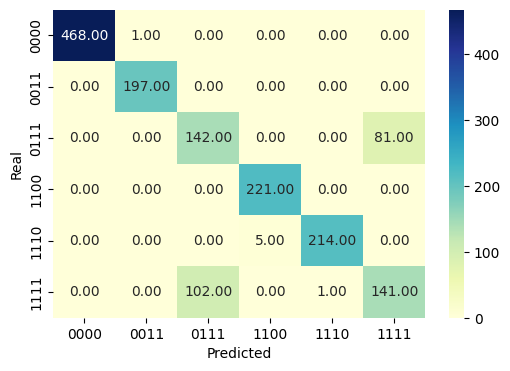

In [55]:
plot_classification_result("Decision tree", y_test, y_pred)

#### Observation

The decision Tree Classifier give a very good result with an average accuracy of 87.9% and the model is able to achieve over 99% recall and precision scores for specific classes (0000, 0011, 1100, 1110), but it still have problems in the the classes (0111, 1111) where is only achieves ~60% recall and precision scores.

### Random Forest Classifier

In [56]:
rf_clf = RandomForestClassifier(n_estimators=200, max_features=5, random_state=1)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

Average accuracy score:  0.8741258741258742
Metrics table:
               precision    recall  f1-score   support

        0000       1.00      1.00      1.00       469
        0011       1.00      1.00      1.00       197
        0111       0.56      0.61      0.58       223
        1100       0.98      1.00      0.99       221
        1110       1.00      0.98      0.99       219
        1111       0.61      0.57      0.59       244

    accuracy                           0.87      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.87      0.87      0.87      1573

Confusion matrix:



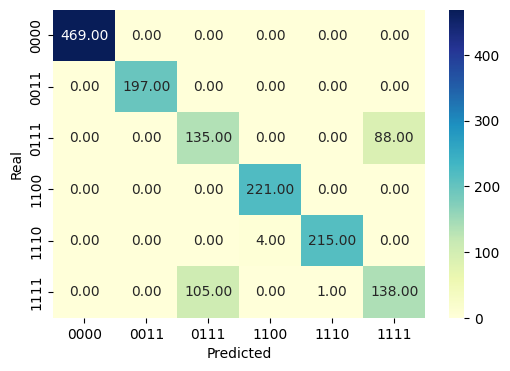

In [57]:
plot_classification_result("Random forest", y_test, y_pred)

#### Observation

The Random Forest Classifier is yielding results comparable to the Decision Tree model, with similar performance. It also faces challenges in the classes (0111, 1111), achieving only around 60% recall and precision scores.

### XGBoost Classifier

In [58]:
xgb_clf = XGBClassifier(n_estimators=200, max_depth=20, random_state=1)
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)

Average accuracy score:  0.8760330578512396
Metrics table:
               precision    recall  f1-score   support

        0000       1.00      1.00      1.00       469
        0011       1.00      1.00      1.00       197
        0111       0.57      0.59      0.58       223
        1100       0.98      1.00      0.99       221
        1110       1.00      0.98      0.99       219
        1111       0.62      0.59      0.61       244

    accuracy                           0.88      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.88      0.88      0.88      1573

Confusion matrix:



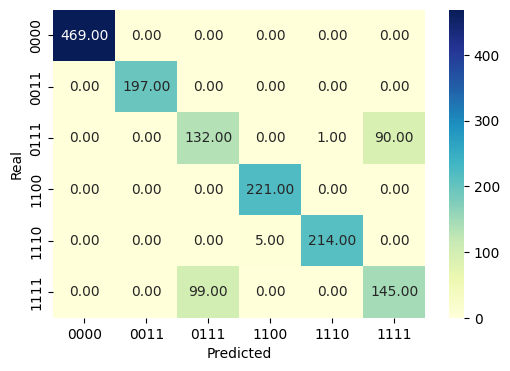

In [59]:
plot_classification_result("XGBoost", y_test, y_pred)

#### Observation

The XGBoost model is producing results similair to the Decision Tree and Random Forest models in the classes (0000, 0011, 1100, 1110), albeit with an average accuracy of 87.6%. The model also encounters significant challenges in predicting the classes (0111, 1111) compared to the other two models, achieving only around 60% recall and precision scores in those specific categories.

### Results analysis

#### Models Precision results

In [60]:
precision_results = pd.DataFrame(precision_scores, index=classes_labels)
precision_results.T

0000  0011  0111  1100  1110  1111
Logistic regression  0.33  0.00  0.30  0.00  1.00  0.00
SVC                  0.90  0.77  0.48  0.82  0.74  0.45
Decision tree        1.00  0.99  0.58  0.98  1.00  0.64
Random forest        1.00  1.00  0.56  0.98  1.00  0.61
XGBoost              1.00  1.00  0.57  0.98  1.00  0.62

#### Models Recall results

In [61]:
recall_results = pd.DataFrame(recall_scores, index=classes_labels)
recall_results.T

0000  0011  0111  1100  1110  1111
Logistic regression   1.0   0.0  0.19  0.00  0.14  0.00
SVC                   1.0   0.9  0.49  0.87  0.83  0.20
Decision tree         1.0   1.0  0.64  1.00  0.98  0.58
Random forest         1.0   1.0  0.61  1.00  0.98  0.57
XGBoost               1.0   1.0  0.59  1.00  0.98  0.59

#### Observation

* With the exception of the logistic regression model, all our models demonstrate strong classification accuracy for the classes (0000, 0011, 1100, 1110), with the Decision Tree and Random Forest models exhibiting the best performance (SVC shows a lower performance than the last three models).

* Challenges arise for all models when predicting the classes (0111, 1111), where the highest precision/recall score achieved is only 61%.

* After an initial round of trial and error tuning, the last 3 classifiers have shown the most promising performance (achieving around 87% average accuracy). As a result, we will try to further fine-tune their hyperparameters with a focus on improving performance for the challenging classes (0111, 1111).

### Model tuning

In [ ]:
import optuna

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400, step=100),
        "max_depth": trial.suggest_int("max_depth", 50, 400, step=50),
        # "min_samples_split": trial.suggest_int("min_samples_split", 10, 20),
        # "min_samples_leaf": trial.suggest_int("min_samples_leaf", 10, 40),
    }

    model = RandomForestClassifier(**params)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    rmse = accuracy_score(y_test, predictions)
    return rmse

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

In [ ]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

In [ ]:
tuned_rf = RandomForestClassifier(**study.best_params)
tuned_rf.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
plot_classification_result("Random Forest tuned", y_test, y_pred)

## 2- Multi-output Classification

In [62]:
data = multiclass_data.copy()
Y = data[["G", "A", "B", "C"]]
X = data.drop(["G", "A", "B", "C", "fault_class"], axis=1)

In [63]:
# Split the dataset: Training(80%), Testing(20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [82]:
outputs = ["Ground", "Line A", "Line B", "Line C"]

def multioutput_perfomance_logs(y_true, y_test):
    print("Average accuracy score: ", accuracy_score(y_true, y_pred))
    for i in range(y_true.shape[1]):
        print(f"{outputs[i]} Fault Classification Report:")
        report = classification_report(np.array(y_true)[:, i], y_pred[:, i])
        print(report)
        print("="*50)

### Decision Tree Classifier

In [83]:
tree = RandomForestClassifier(random_state=1)
multi_tree = MultiOutputClassifier(tree, n_jobs=-1)
multi_tree.fit(x_train, y_train)
y_pred = multi_tree.predict(x_test)

In [84]:
multioutput_perfomance_logs(y_test, y_pred)

Average accuracy score:  0.8684043229497775
Ground Fault Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       889
           1       0.86      0.84      0.85       684

    accuracy                           0.87      1573
   macro avg       0.87      0.87      0.87      1573
weighted avg       0.87      0.87      0.87      1573

Line A Fault Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       666
           1       1.00      1.00      1.00       907

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

Line B Fault Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       690
           1       1.00      0.99      1.00       883

    accuracy                  

### Random Forest Classifier

In [85]:
forest = RandomForestClassifier(random_state=1)
multi_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_forest.fit(x_train, y_train)
y_pred = multi_forest.predict(x_test)

In [86]:
multioutput_perfomance_logs(y_test, y_pred)

Average accuracy score:  0.8684043229497775
Ground Fault Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       889
           1       0.86      0.84      0.85       684

    accuracy                           0.87      1573
   macro avg       0.87      0.87      0.87      1573
weighted avg       0.87      0.87      0.87      1573

Line A Fault Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       666
           1       1.00      1.00      1.00       907

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

Line B Fault Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       690
           1       1.00      0.99      1.00       883

    accuracy                  

### XGBoost Classifier

In [87]:
xgboost = XGBClassifier(random_state=1)
multi_xgboost = MultiOutputClassifier(xgboost, n_jobs=-1)
multi_xgboost.fit(x_train, y_train)
y_pred = multi_xgboost.predict(x_test)

In [88]:
multioutput_perfomance_logs(y_test, y_pred)

Average accuracy score:  0.82453909726637
Ground Fault Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       889
           1       0.81      0.79      0.80       684

    accuracy                           0.83      1573
   macro avg       0.82      0.82      0.82      1573
weighted avg       0.83      0.83      0.83      1573

Line A Fault Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       666
           1       1.00      1.00      1.00       907

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

Line B Fault Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       690
           1       1.00      1.00      1.00       883

    accuracy                    

### Results Analysis

* The analysis of the results reveals that all three models demonstrate flawless precision and recall scores (100%) when predicting faults along the (A, B, C) lines. However, their performance falters when it comes to predicting Ground faults.

* Both the decision tree and random forest classifiers exhibit the highest average accuracy at 86.8%. These models also outperform the XGBoost model in terms of precision and recall scores (>85%) when predicting Ground faults. In contrast, the XGBoost model faces challenges in this category, yielding lower precision and recall scores (less than 85%), leading to its inferior average accuracy of 82.4%.


### Conclusion

* The top-performing multi-label model was the decision tree classifier, boasting the highest average accuracy of 87.9%. However, like other multi-label models, it encounters challenges in accurately predicting specific fault types (0111, 1111) where only ~60% precision and recall scores can be obtained.

* With the multi-output models, we achieved maximum accuracy in predicting faults along the (A, B, C) lines. These models also demonstrated relatively strong performance in predicting ground faults, with precision and recall scores hovering around 85%. Both the decision tree and random forest classifiers stood out with the highest average accuracy at 86.8%.

* Considering these findings, if an immediate need arises for a fault detection model, the multi-output decision tree (or random forest) classifier emerges as the optimal choice. It ensures the most accurate predictions across all fault types.


# Summary

In our investigation, we discovered the following key findings:

* Binary classification demonstrated the high accuracy achievable in predicting faults within the transmission line system. Leveraging measurements of phase currents and voltages, we trained multiple ML models, resulting in an impressive 99.4% overall accuracy.

* The application of multi-output classifiers allowed us to develop models capable of pinpointing the specific line experiencing a fault (G, A, B, C). These models excelled in achieving maximum accuracy for faults along the (A, B, C) lines, while also demonstrating an good accuracy (85%) in predicting ground faults.
